## Artificial Neural Network - Predicting Churn

## Library imports

In [3]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load the dataset and verification

In [4]:
df = pd.read_csv('datasets/Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for any missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there are no missing values in the dataset

In [4]:
# Check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Exploration and Visualizations

In [ ]:
# Plot all needed variable across dataset by Exited status

sns.pairplot(df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']], hue='Exited')

0    7963
1    2037
Name: Exited, dtype: int64

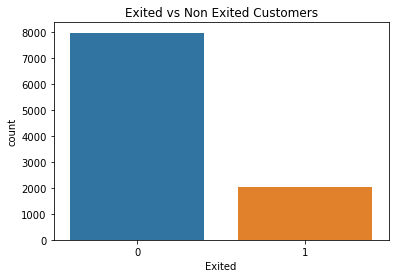

In [5]:
# Check on the response variable
sns.countplot(x='Exited', data=df)
plt.title('Exited vs Non Exited Customers')

df['Exited'].value_counts()

Around 20% of the customers in the dataset have exited

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

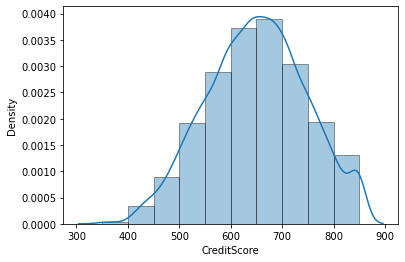

In [6]:
# Explore the variable CreditScore

sns.distplot(df['CreditScore'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

Text(0.5, 1.0, 'Distribution of CreditScore by Exit Status')

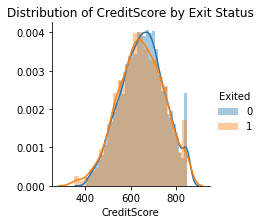

In [7]:
g = sns.FacetGrid(data=df, hue='Exited')
g.map(sns.distplot, 'CreditScore').add_legend()
plt.title("Distribution of CreditScore by Exit Status")

Exited customers are present, across the distribution of CreditScore

Text(0.5, 1.0, 'Geography Distribution of Customers by Exit Status')

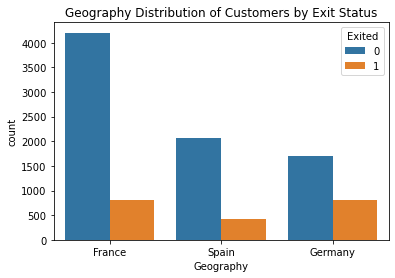

In [8]:
# Check the geography variable

sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography Distribution of Customers by Exit Status')

Text(0.5, 1.0, 'Gender Distribution of Customers by Exit Status')

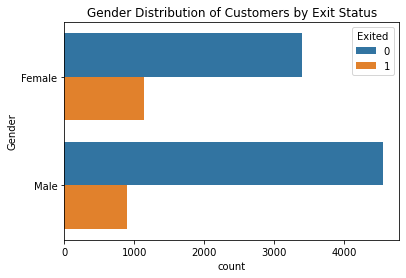

In [9]:
# Check the gender variable

sns.countplot(y='Gender', hue='Exited', data=df)
plt.title('Gender Distribution of Customers by Exit Status')

<AxesSubplot:xlabel='Age', ylabel='Density'>

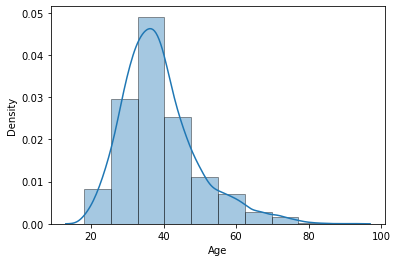

In [10]:
# Explore the Age Variable

sns.distplot(df['Age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

Text(0.5, 1.0, 'Distribution of Age by Exit Status')

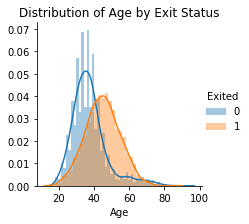

In [11]:
g = sns.FacetGrid(data=df, hue='Exited')
g.map(sns.distplot, 'Age').add_legend()
plt.title("Distribution of Age by Exit Status")

Average age of customers who have exited is more than the ones who have stayed

Text(0.5, 1.0, 'Tenure Distribution of Customers by Exit Status')

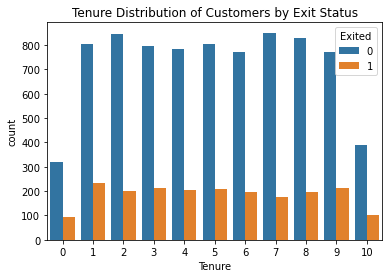

In [12]:
# Explore the Tenure Variable

sns.countplot(x='Tenure', hue='Exited', data=df)
plt.title('Tenure Distribution of Customers by Exit Status')

<AxesSubplot:xlabel='Balance', ylabel='Density'>

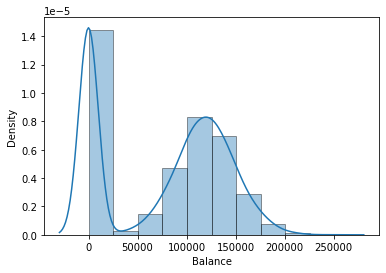

In [13]:
# Explore the Balance Variable

sns.distplot(df['Balance'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

In [14]:
#There are quite a number of customers with 0 balance in the data
df[df['Balance'] == 0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Distribution of Exit Status for Customers with Balance 0')

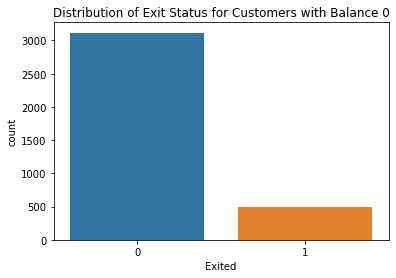

In [15]:
# Distribution of Exit Status for customers whose balance is 0
sns.countplot(df[df['Balance'] == 0]['Exited'])
plt.title("Distribution of Exit Status for Customers with Balance 0")

Text(0.5, 1.0, 'Distribution of Balance by Exit Status')

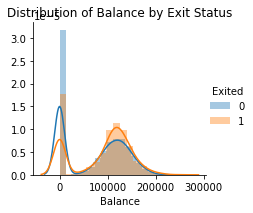

In [16]:
g = sns.FacetGrid(data=df, hue='Exited')
g.map(sns.distplot, 'Balance').add_legend()
plt.title("Distribution of Balance by Exit Status")

Text(0.5, 1.0, 'NumOfProducts Distribution of Customers by Exit Status')

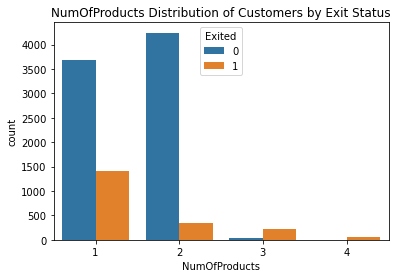

In [17]:
# Explore num of products

sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('NumOfProducts Distribution of Customers by Exit Status')

An interesting observation - Customers having number of Products 3, have exited more

Text(0.5, 1.0, 'HasCrCard Distribution of Customers by Exit Status')

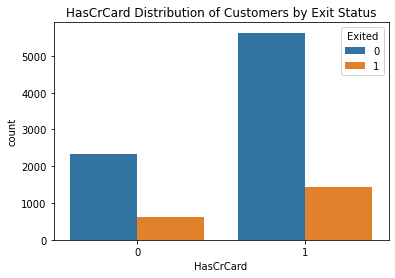

In [18]:
# Explore HasCrCard

sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('HasCrCard Distribution of Customers by Exit Status')

Text(0.5, 1.0, 'IsActiveMember Distribution of Customers by Exit Status')

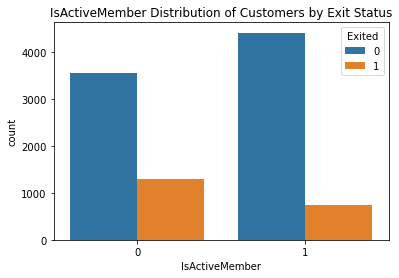

In [19]:
# Explore IsActiveMember

sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('IsActiveMember Distribution of Customers by Exit Status')

greater proportion of customers have left, who is not an active member

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

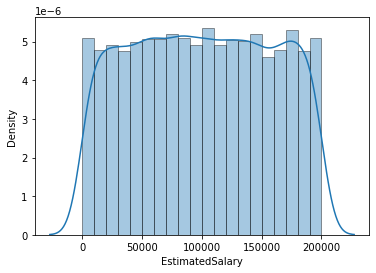

In [20]:
# Explore the EstimatedSalary variable

sns.distplot(df['EstimatedSalary'], hist_kws=dict(edgecolor='k', linewidth=1), bins=20)

In [21]:
print('Average Salary for People who have exited')
print(df[df['Exited'] == 1]['EstimatedSalary'].mean())
print("\n")
print('Average Salary for People who have stayed')
print(df[df['Exited'] == 0]['EstimatedSalary'].mean())

Average Salary for People who have exited
101465.67753068237


Average Salary for People who have stayed
99738.39177194524


Average Salary for people who have stayed and left are more or less the same

Text(0.5, 1.0, 'Distribution of EstimatedSalary by Exit Status')

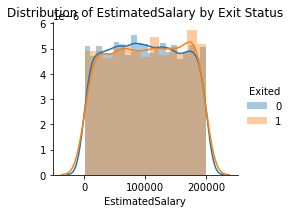

In [22]:
g = sns.FacetGrid(data=df, hue='Exited')
g.map(sns.distplot, 'EstimatedSalary').add_legend()
plt.title("Distribution of EstimatedSalary by Exit Status")

## Data Preprocessing

In [23]:
# Check the columns

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
# Create the feature variable set and target variable

#features = df.iloc[:, 3:13].values
#target = df.iloc[:, 13].values

features = df.iloc[:, 3:13]
target = df.iloc[:, 13]

So with our own logic, we are able to say which independent variables might have impacton the dependent variable but what we don't know is which independent variable has the most impact on the dependent variable. And that's what our artificial neural network will spot and we'll perfectly see by looking at the correlations here and therefore,
it will give the bigger weight in the neural network to those independent variables that have the most impact.

In [25]:
# Neural networks takes numerical data and hence we need to do encoding for categorical data

# We will do only for 'Geography' and 'Gender' variable only, as they are not numerical

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
features['Geography'] = labelEncoder.fit_transform(features['Geography'])
features['Gender'] = labelEncoder.fit_transform(features['Gender'])

features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


Since our categorical variables are not ordinal. That means that there is no relational order between the categories of our categorical variables. That is, you know, France is not higher than Germanyand Germany isn't higher than France, and same between Spain and Germany and Spain and France.

Hence, Once we encode the categorical variable into numerical, we need to create dummy variables through one hot encoding. We will only do it for Geography column, since this column has three values.

We will not do it for Gender column, since it contains two categories. So since we will then remove one column to avoid the dummy variable trap.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), [1])], remainder='passthrough')
features = columnTransformer.fit_transform(features)

In [27]:
# Check the features set again

features

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

For the Geography column - Three dummy variables are created for each of the encoded label. In order to avoid the dummy trap, we will remove one of the variable (column) - Lets say the first column

In [28]:
features = features[:, 1:]

In [29]:
# splitting the dataset into training and test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                            random_state=101, stratify = target)

In [30]:
# perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

*𝑥′=(𝑥−𝜇)/𝜎*

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters 𝜇 and 𝜎 (values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. 𝜇 and 𝜎 in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set 𝑥, but it also returns a transformed 𝑥′. Internally, it just calls first fit() and then transform() on the same data.

### Build the ANN

In [31]:
# import the libraries

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The Sequential module that is required to initialize our neural network and the Dense module that is required
to build the layers of our ANN.

In [32]:
# Initialize the ANN

classifier = Sequential()

**Let's refresh our memories to remind us about the different steps of how an Artificial Neural Network is built.**

* <p>The first step is to randomly initialize the weights of each of the nodes to small numbers close to zero. So that will be done thanks to the Dense function which we take from this Dense module here that we imported previously. So basically, this Dense function that we're gonna use is going to take care of this first step.</p>

* <p>Then, next step, our first observation row goes into the neural network - So we already know the number of nodes we'll have in our input layer, and this number is nothing else than the number of independent variables we have in our matrix of features. That is 11 independent variables.</p>

* <p>Then the third step is forward-propagation, so from left to right the neurons are activated by the activation function in such a way that the higher the value of the activation function is for the neuron, the more impact this neuron is going to have in the network. That means the more it will pass on the signal from the nodes on the left to the nodes on the right,</p>

* <p>Now speaking of activation function, what we'll have to do in this tutorial to define the first hidden layer is to choose an activation function and as a reminder, there are several activation functions and the best one based on experiments and based on research is the rectifier function, which you can see right here. We also have this sigmoid function which is really good for output layer since using the sigmoid function for the output layer will allow us to get the probabilities of the different class, that means that will get the probability that the class equals one for each of the observation and even the new observations of the test set when we'll make our predictions.</p>

* <p> So that means that for each observations of the test set we'll get the probability that the customer leaves the bank and the probability that the customer stays in the bank</p>

* <p>Alright, so to summarize, we'll choose the rectifier activation function for the hidden layers and we'll choose the sigmoid activation function for the output layer.</p>

* <p>Alright, next the algorithm compares the predicted result to the actual result and that generates an error and then in the step five this error is back-propagated in the neural network from right to left and all the weights are updated according to how much they are responsible for this generated error. And by the way, there are several way of updating these weights and this way is defined by the learning rate perimeter which decides by how much the weights are updated.</p>

* <p>Next we repeat the previous steps steps after each observation or either after a batch of observations like for example we update the weights every ten observations going into the network and finally step seven, when the whole training set passed through the A.N.N. that makes an epoch and re-repeat many more epoch. And we will see how many epoch we choose to do in the end.</p>

In [33]:
# Adding the input layer and the first hidden layer of the neural network

#classifier.add(Dense(output_dim=6, init='uniform', activation='relu', input_dim=11))

# More recent because of API Changes
classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer='uniform'))

* the activation argument which of course is the activation function we want to choose in our hidden layer.<br><br>
* The parameter - units. That is simply the number of nodes you want to add in this hidden layer, because more precisely, what this add function does is not to add the input layer in the first hidden layer, what it really does is add this hidden layer, and by adding this hidden layer we're specifying the number of inputs in the previous layer which is the input layer.<br><br>
* Indeed, there is no rule of thumbs on what would be the optimal number of nodes in this hidden layer.This tip is to choose the number of nodes in the hidden layer as the average of the number of nodes in the input layer and the number of nodes in the output layer.<br><br>
* That is the tip you want to use but if you want to be an artist, well what you have to do is experimenting with a technique called parameter tuning. Parameter tuning is about using some techniques, like k-fold cross validation for example which we'll study in part 10, model selection and ensemble model and these k-fold cross validation technique consists on creating a separate set in your data set besides the training set and the test that is called a cross validation set and basically in this set, you experiment different perimeters of your model, so typically the number of hidden layers and the number of nodes in the hidden layers and then you test the performance of your different models with the different perimeters.<br><br>
* So we won't do it now obviously, because we want to focus on our Artificial Neural Network, but keep that in mind and keep in mind that we'll do this in part 10 and that it will help us choose the optimal perimeters of our model, but for now we're gonna take this tip which is to take the average of the number of nodes in the input layer and the number of nodes in the output layer<br><br>
* well the number of nodes in the input layer is 11, and the number of nodes in the output layer is one, and so the average is 11 plus one divided by two, that is six nodes in the hidden layer.<br><br>
* The next parameter is init (kernel_initializer), so that corresponds to the step one of the Stochastic Gradient Descent and so what we have to do now is we have to randomly initialize the weight as small numbers close to zero and so we can randomly initialize them with a uniform function.<br><br>

In [34]:
# Adding the second hidden layer

classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))

* we need to specify this input_dim parameter for the first hidden layer because no layer was created yet and therefore this hidden layer here didn't know what to expect as input nodes. So that's why we had to specify. <br><br>

* But here for the second hidden layer, well it knows what to expect because the first hidden layer was created so we don't need to specify any input_dim parameter here so we can remove it.

In [35]:
# Adding the output layer

classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

and by the way if you are dealing with a dependent variable that has more than two categories, like say for example three categories, then you will need to change two things here. First is the unit parameter that will be set as the number of classes, because it will be based on the one viesol method, while the dependent variable is one hot encoded, so here you would need to input three, if you have three categories for your dependent variable, and the second thing that you would need to change is the activation function, that in this situation would be softmax, and softmax is actually the sigmoid function, but applied to a dependent variable that has more than two categories, so just keep that in mind if in your work you are dealing with a dependent variable that has more than two categories, like three or four categories, you would need to choose the softmax function.

In [36]:
# Compiling the ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* The first argument is optimizer, optimizer is simply the algorithm you wanna use to find the optimal set of weights in the neural networks. Because you know we defined our neural networks, it is built with the different layers, but the weights are still only initialized. So now we have to apply some sort of algorithm to find the best weights that will make our neural network the most powerful. And so that's why in this compile method here we need to add an algorithm, and this algorithm is going to be nothing else than the stochastic gradient descent algorithm, and there are several types of stochastic gradient descent algorithm, and a very efficient one is called Adam, and that's exactly what's going to be the input of this optimizer parameter.<br><br>

* The next parameter is called the loss function. Loss function - loss function here is not the sum of squared errors like for linear regression, but is going to be a logarithmic function that is called the logarithmic loss. And so since the activation function for our output layer is nothing else than the sigmoid function - Well, if your dependent variable has a binary outcome, then this logarithmic loss function is called binary underscore cross entropy, and if your dependent variable has more than two outcomes, like three categories, then this logarithmic loss function is called categorical underscore cross entropy.<br><br>

* Third and final argument is metrics - a criterion that you choose to evaluate your model, and typically we use the accuracy criterion. So basically what happens is that, when the weights are updated after each observation or after each batch of many observations, the algorithm uses this accuracy criterion to improve the model's performance. This parameter takes a list of items, since we use only accuracy criteria

### Making the predictions and evaluating the model

* First argument is the dataset on which we want to train our classifier - training set. this training set is separated in two arguments first features train, that is the matrix it features containing the observations of the train set, and then y train that contains the actual outcomes of the dependent variable for all the observations in our training set. <br><br>
* The next additional argument is going to be the batch size. And the batch size is the number of observations after which, you want to update the weight. <br><br>
* The next additional argument is epoch. An epoch is basically a round when the whole training set passed through the A&N. So here we are going to input the number of epochs.<br><br>

There is no rule as to how many batch size and how many epochs - all from your deep learning soul

In [37]:
# Fitting the ANN to the training set

classifier.fit(features_train, target_train, batch_size=10, epochs=100)

Epoch 1/100
700/700 [==============================] - 0s 417us/step - loss: 0.5002 - accuracy: 0.7986
Epoch 2/100
700/700 [==============================] - 0s 410us/step - loss: 0.4049 - accuracy: 0.8281
Epoch 3/100
700/700 [==============================] - 0s 402us/step - loss: 0.3925 - accuracy: 0.8304
Epoch 4/100
700/700 [==============================] - 0s 408us/step - loss: 0.3851 - accuracy: 0.8317
Epoch 5/100
700/700 [==============================] - 0s 410us/step - loss: 0.3776 - accuracy: 0.8344
Epoch 6/100
700/700 [==============================] - 0s 405us/step - loss: 0.3725 - accuracy: 0.8393
Epoch 7/100
700/700 [==============================] - 0s 405us/step - loss: 0.3673 - accuracy: 0.8470
Epoch 8/100
700/700 [==============================] - 0s 403us/step - loss: 0.3641 - accuracy: 0.8511
Epoch 9/100
700/700 [==============================] - 0s 404us/step - loss: 0.3606 - accuracy: 0.8531
Epoch 10/100
700/700 [==============================] - 0s 433us/step - l

In [38]:
# Predicting the test set results

target_pred = classifier.predict(features_test)

target_pred  # This shows the predicted probabilities that customer will leave the bank

array([[0.02953699],
       [0.17780843],
       [0.05374354],
       ...,
       [0.03441036],
       [0.02116007],
       [0.0233272 ]], dtype=float32)

In [39]:
# In order to use it in Confusion Matrix

target_pred = (target_pred > 0.5)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, f1_score

print("Confusion Matrix")
print(confusion_matrix(target_test, target_pred))
print("\n")
print("Balanced Accuracy Score")
print(balanced_accuracy_score(target_test, target_pred))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, target_pred))
print("\n")
print("F1 Score")
print(f1_score(target_test, target_pred))
print("\n")
print("Classification Report")
print(classification_report(target_test, target_pred))

Confusion Matrix
[[2322   67]
 [ 354  257]]


Balanced Accuracy Score
0.696288362030282


Accuracy Score
0.8596666666666667


F1 Score
0.5497326203208557


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.42      0.55       611

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



### Should we say Goodbye to that customer?

Use our ANN model to predict if the customer with the following informations will leave the bank: 

* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: $60000

* Number of Products: 2

* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $50000

*So should we say goodbye to that customer ?*

In [41]:
# We need to put this information in the form of matrix in the exact same order as feature matrix in predict func
# then we have to apply the standard scaler object to scale the same

# Since standard scaler expects, floating numbers and we are passing all integers, hence in conversion, it will
# throw warning.. in order to suppress the same, we will pass just one of values in the array as a floating num

print(features[0])
df.head()

new_pred = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_pred = (new_pred > 0.5)

[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0134888e+05]


In [42]:
# Check the prediction
new_pred[0][0]

False

So the customer doesnt leave the bank

Measuring the accuracy on one single test set is not the most relevant way to evaluate the models performance because by retraining the model several times we get different accuracies. Not only on the training sets but also on the test. So we need to figure out a better way to evaluate the most performance. And that's exactly what we're going to do in the next section about performance evaluation. 
<br>
And the solution to this is careful cross-validation.

### Evaluating , Improving and Tuning the ANN

#### Implementing K-fold cross validation - Evaluating the model

When we implement K-Fold cross validation - we dont need to run the earlier part of building, evaluating and running the neural network. This part will be included in the K-fold cross validation. 

We will need to run the data-preprocessing phase

In [43]:
# Create the feature variable set and target variable

features = df.iloc[:, 3:13]
target = df.iloc[:, 13]

# Neural networks takes numerical data and hence we need to do encoding for categorical data

# We will do only for 'Geography' and 'Gender' variable only, as they are not numerical

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
features['Geography'] = labelEncoder.fit_transform(features['Geography'])
features['Gender'] = labelEncoder.fit_transform(features['Gender'])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), [1])], remainder='passthrough')
features = columnTransformer.fit_transform(features)

features = features[:, 1:]

features

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [44]:
# splitting the dataset into training and test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                            random_state=101, stratify=target)

# perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

Well the tricky thing is that here, we implemented a model with Keras and the K-fold cross validation function that we'll use, belongs to Scikit-learn, and therefore we need to, in some way, combine Keras and Scikit-learn together. And there is the perfect module for it and that belongs to Keras. Its a Keras wrapper that will wrap K-fold cross validation by Scikit-learn, into the Keras model. So in other words, we will be able to include K-fold cross validation in our Keras classifier. So, the first thing that we need to do is to import all these tools, that is the wrapper and the cross validation function by Scikit-learn, that we will then combine.

* Keras classifier that we imported here expects for one of its arguments a function. It's actually its first argument we will see called Build FN, Build Function. And this function is simply a function that returns the classifier that we made here with all this architecture. So basically this function just builds the architecture of our artificial neural network.

* This classifier will be the same classifier as we built here but this will not be trained on the whole training set composed of x train and y train, but rather It will be built through careful cross validation on 10 different training folds and by each time measuring the model performance on one test fold.

* So as you understood, the use of K-fold cross validation is to return a relevant measure of the accuracy of our artificial neural network on the test set and therefore the cross val score function will return the 10 accuracies of the 10 test folds that occur in K-fold cross validation.

* First argument of cross_val_score is estimator. That's the object to use to fit the data. Well, that's of course, our classifier. Then, next argument. The next parameter is X and that is the data to fit. So basically, that's the training set. Now the next argument is y and is the target variable of this same train set

* cv is basically the number of folds, of train test folds you wanna create when applying K-fold cross validation. With 10 accuracies we will clearly see if we have good accuracy, that is, If we have low bias and if we don't have too much variance

* This argument, this last parameter, is n jobs. Okay, so n jobs is the number of cv used to use to do the computation. And minus one means all CPU's, and therefore what it will do is run parallel computations to get this done faster. So we will not see one training fold one at a time, we will see the different trainings on the different train folds run at the same time. So that's a very important argument

Remember, we are doing this to check two things; first, what is the real relevance accuracy, And then the second thing we wanna check is where we are in the bias variance trade-off and so we need to check that we have a low bias and a low variance that is, high accuracies and small differences, small variance between these accuracies that we are about to get.

In [45]:
## Evaluating the model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer='uniform'))
    classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))
    classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=100)

In [46]:
# Run the K-Fold cross validation

accuracies = cross_val_score(estimator=classifier, X=features_train, y=target_train, cv=10, n_jobs=-1, verbose=100)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  2.0min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.0min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  2.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.0min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.0min remaining:   51.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  2.0min remaining:   29.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


In [47]:
# relevant accuracy and variance for the model
print("Accuracy of the model")
print(accuracies.mean())
print("Variance of the model")
print(accuracies.std())

Accuracy of the model
0.8394285798072815
Variance of the model
0.01840806723466882


We see we have an accuracy of 83.53% and a low variance of 1.9%

#### Improving the ANN

We will implement Dropout regularization. This will be added to each layer. The first argument of the dropout function is the fraction of the neurons we want to drop (start with 0.1 and in general don't try to go over 0.5 because then you'll get too close to underfitting.)

In [48]:
# if we have too much of variance, we will implement the dropout regularization and implement K-fold Cross Val

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer='uniform'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=100)
accuracies = cross_val_score(estimator=classifier, X=features_train, y=target_train, cv=10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


In [49]:
# relevant accuracy and variance for the model
print("Accuracy of the model")
print(accuracies.mean())
print("Variance of the model")
print(accuracies.std())

Accuracy of the model
0.8328571438789367
Variance of the model
0.008280784984615161


### Tuning the ANN - Parameter Tuning

We have two type of parameters. We have the parameters that are learnt from the model during the training and these are the weights and we have some other parameters that stay fixed and these parameters are called the hyper parameters. So for example these hyper parameters are the number of a epoch, the batch size, the optimizer or the number of neurons in the layers.

And when we trained our artificial neural network well, we trained it with some fixed values of these hyper parameters. But maybe that by taking some other values, we would get to a better accuracy overall with careful cross validation. And so that's what parameter tuning is all about. It consists of finding the best values of these hyper parameters and we are gonna do this with a technique called grid search that basically will test several combinations of these values and will eventually return the best selection, the best choice that leads to the best accuracy with careful cross validation.

<i>
So, you can totally do something else, you can have some lunch, have some dinner, have some fun work on another project, you can even go to sleep and actually that's what I'm about to do because, this will actually take quite some time, several hours maybe, that's why I'm recommending to do something else because this is going to take some time. So feel free to do whatever you want, but in the end you will get a much better result than this 83% accuracy. So lets set some goals with this accuracy. The absolute great goal would be 86% lets set this as the gold medal. Then another great goal less hard to reach would be 85% and lets say that if we reach this goal we have the silver medal and lets say that if we reach 84% we have the bronze medal. And before 84% well we're at the same level as in the previous tutorial, which remember was 83%, so we get no medal.</i>

#### We will run the data preprocessing section again (just so that we start clean!!)

In [5]:
# Create the feature variable set and target variable

features = df.iloc[:, 3:13]
target = df.iloc[:, 13]

# Neural networks takes numerical data and hence we need to do encoding for categorical data
# We will do only for 'Geography' and 'Gender' variable only, as they are not numerical

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
features['Geography'] = labelEncoder.fit_transform(features['Geography'])
features['Gender'] = labelEncoder.fit_transform(features['Gender'])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(sparse=False), [1])], remainder='passthrough')
features = columnTransformer.fit_transform(features)

features = features[:, 1:]

# splitting the dataset into training and test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                            random_state=101, stratify=target)
 # perform feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer='uniform'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)

# create a dictionary with hyper parameters
params = {'batch_size': [25, 35], 'epochs': [100, 200], 'optimizer': ['adam', 'rmsprop']}
# create the grid search object - with the number of folds for k-fold cross validation
# scoring of each of the param in params dictionary will happen based on accuracy
grid_search = GridSearchCV(estimator=classifier, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1,
                          verbose=4)
# we will now fit this grid_search object onto our training sets
grid_search = grid_search.fit(features_train, target_train)

# Now to get the best selection of parameters and best accuracy
print("Best Parameters")
best_params = grid_search.best_params_
print(best_params)
print("Best Accuracy")
best_accuracy=grid_search.best_score_
print(best_accuracy)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7937
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.7963
Epoch 3/100
200/200 [==============================] - 0s 958us/step - loss: 0.4362 - accuracy: 0.7963
Epoch 4/100
200/200 [==============================] - 0s 975us/step - loss: 0.4321 - accuracy: 0.7963
Epoch 5/100
200/200 [==============================] - 0s 980us/step - loss: 0.4330 - accuracy: 0.7963
Epoch 6/100
200/200 [==============================] - 0s 960us/step - loss: 0.4270 - accuracy: 0.7963
Epoch 7/100
200/200 [==============================] - 0s 978us/step - loss: 0.4281 - accuracy: 0.7963
Epoch 8/100
200/200 [==============================] - 0s 961us/step - loss: 0.4235 - accuracy: 0.7963
Epoch 9/100
200/200 [==============================] - 0s 993us/step - loss: 0.4229 - accuracy: 0.7963
Epoch 10/100
200

In [7]:
print("Best Parameters - {0}".format(best_params))
print("Best Accuracy - {0}".format(best_accuracy))

Best Parameters - {'batch_size': 35, 'epochs': 100, 'optimizer': 'adam'}
Best Accuracy - 0.8388571428571427
